<a href="https://colab.research.google.com/github/sviii09/FMML_project-labs/blob/main/AIML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv
Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

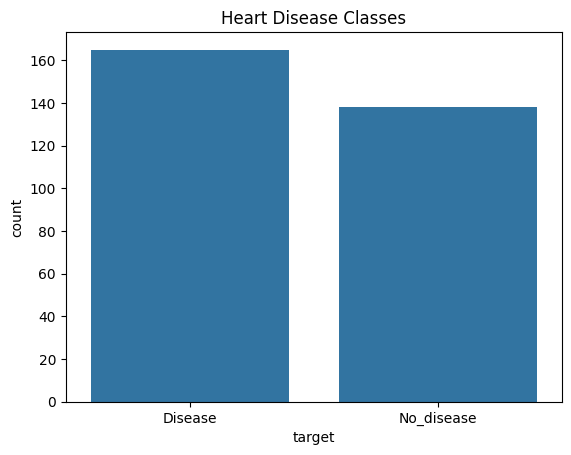

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

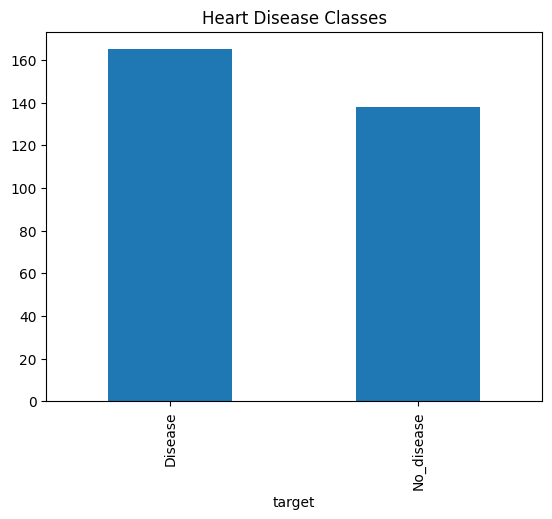

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [22]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the 'sex' column exists in the dataset
if 'sex' in data.columns:
    # Create a bar plot to show the count of male vs female participants
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sex', data=data, palette='Set2')
    plt.title('Distribution of Participants by Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')  # Assuming 0 = Female, 1 = Male
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'sex' column does not exist in the dataset.")


The 'sex' column does not exist in the dataset.


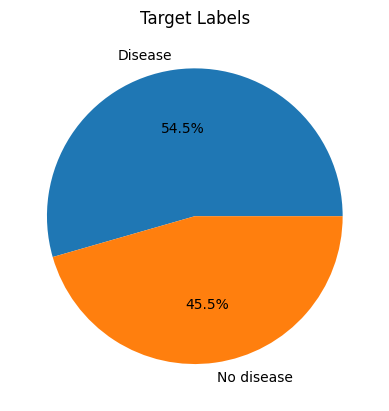

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

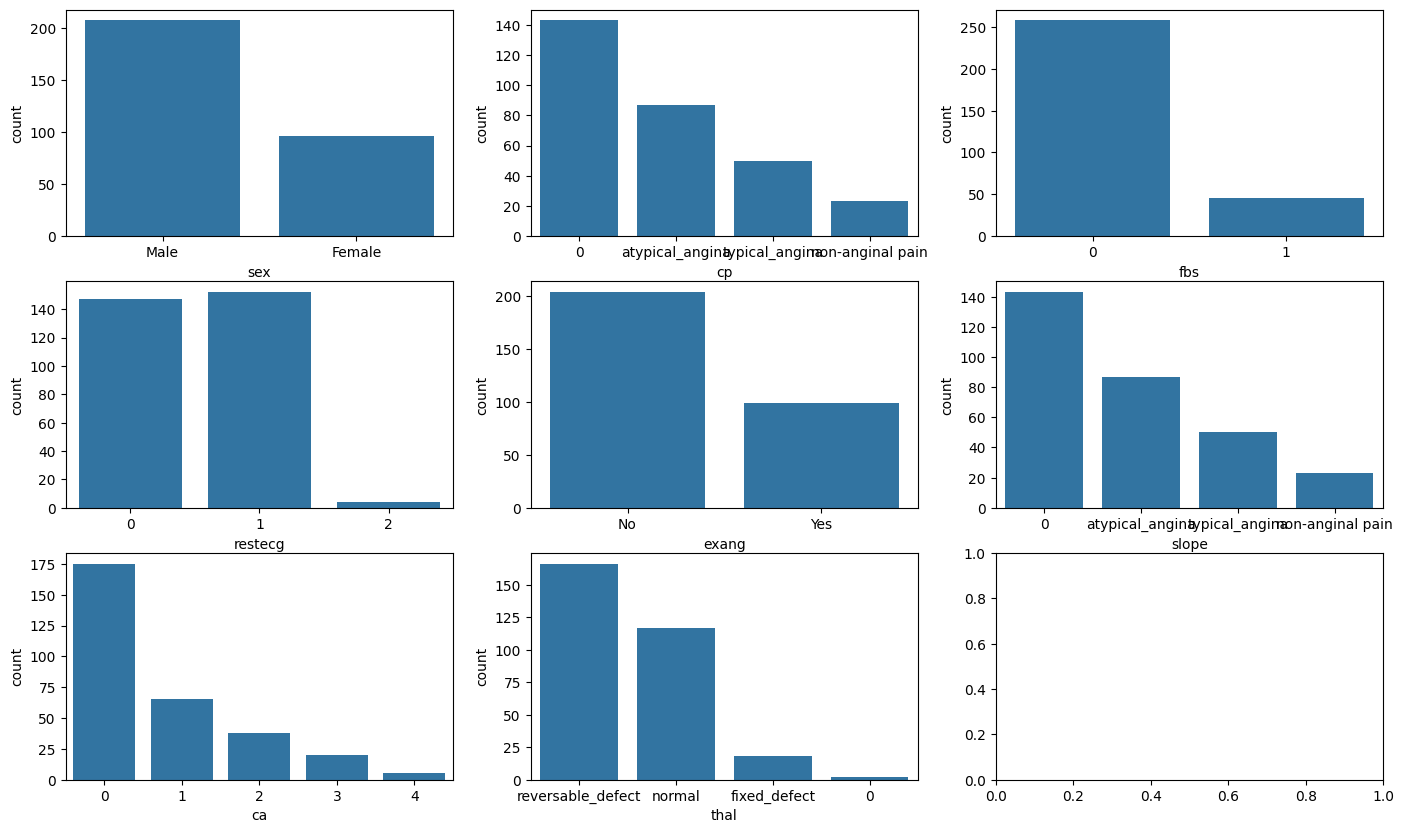

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

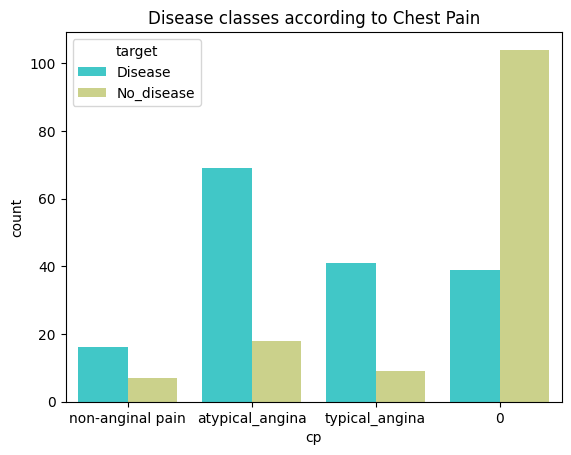

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

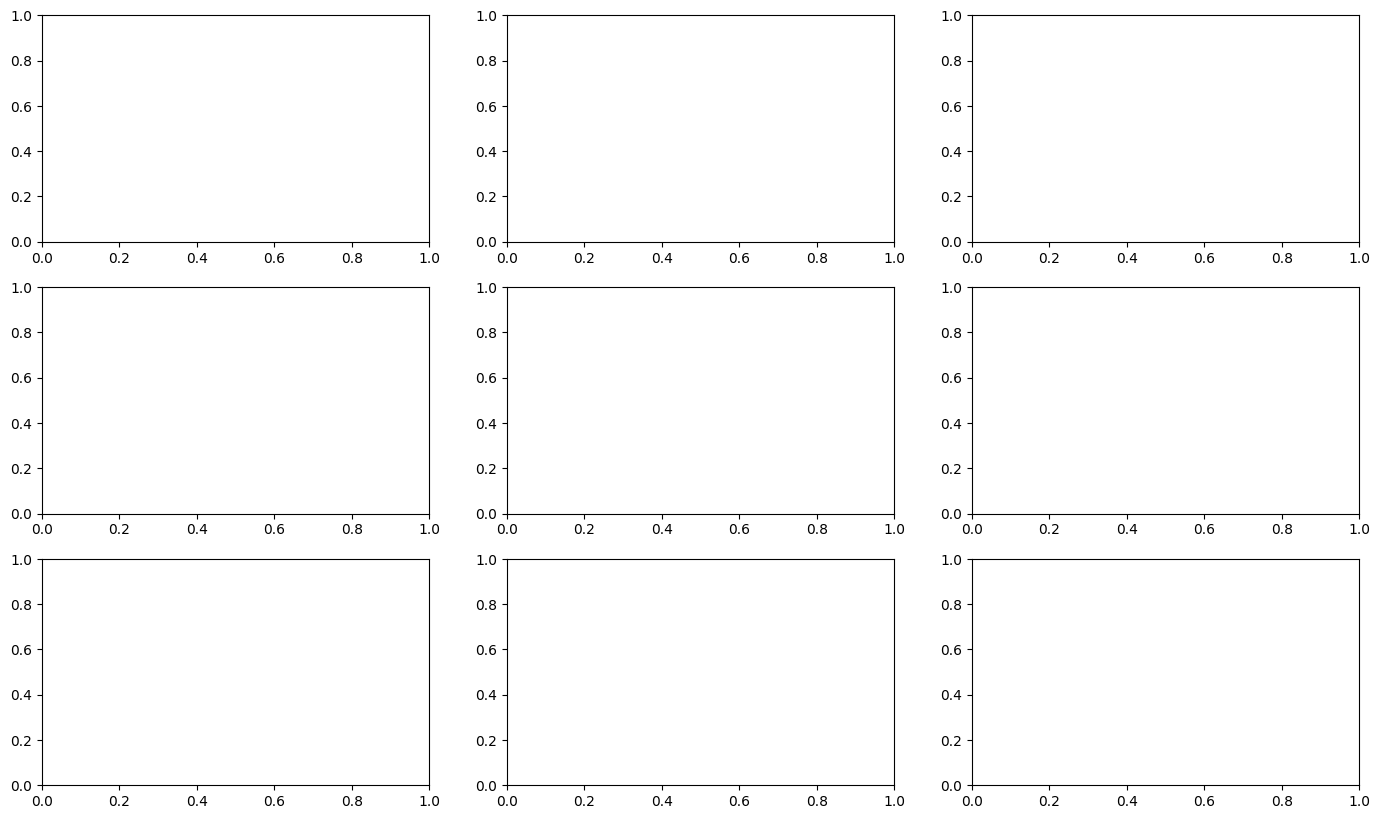

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [ ]:
# Visualising the distribution of the continous variables

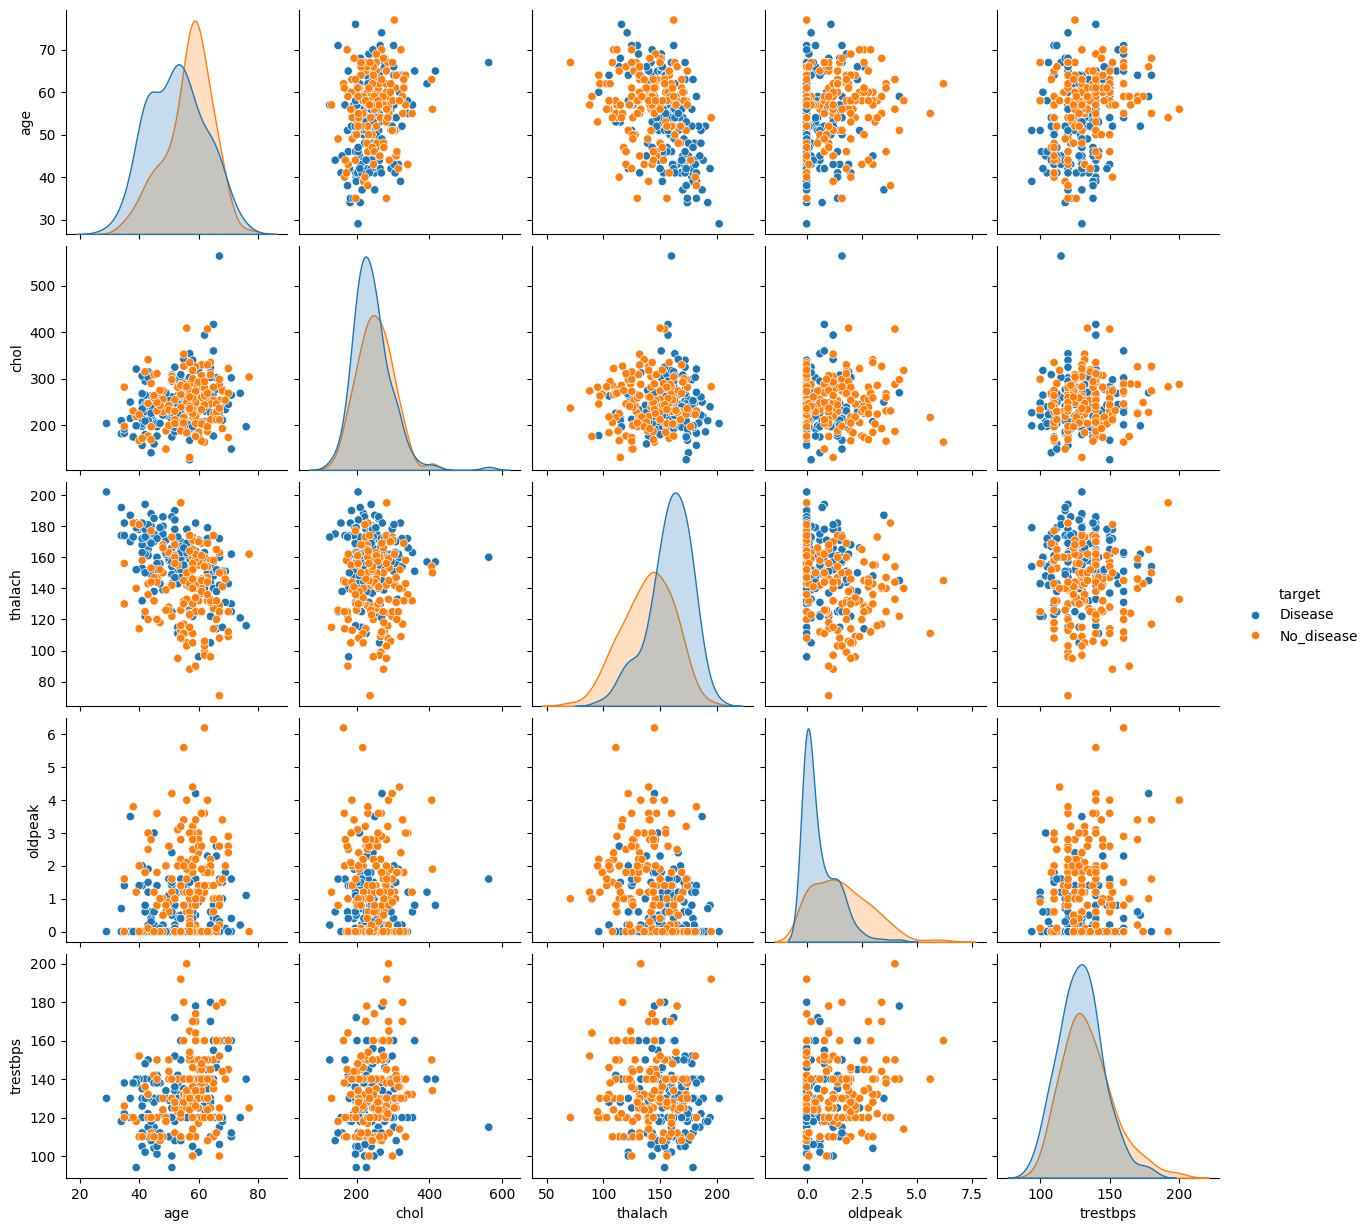

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

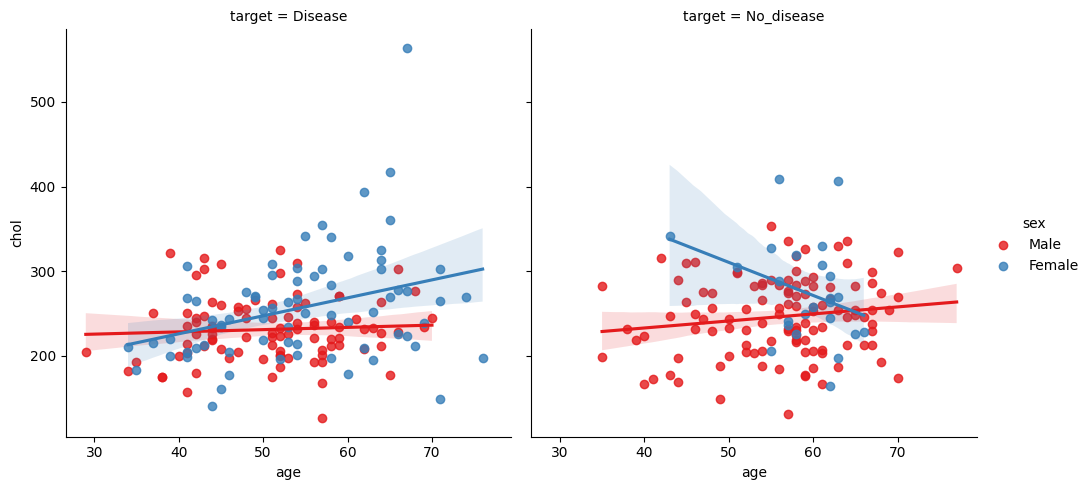

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

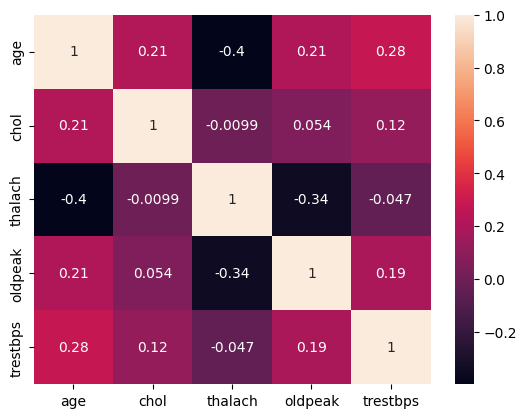

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

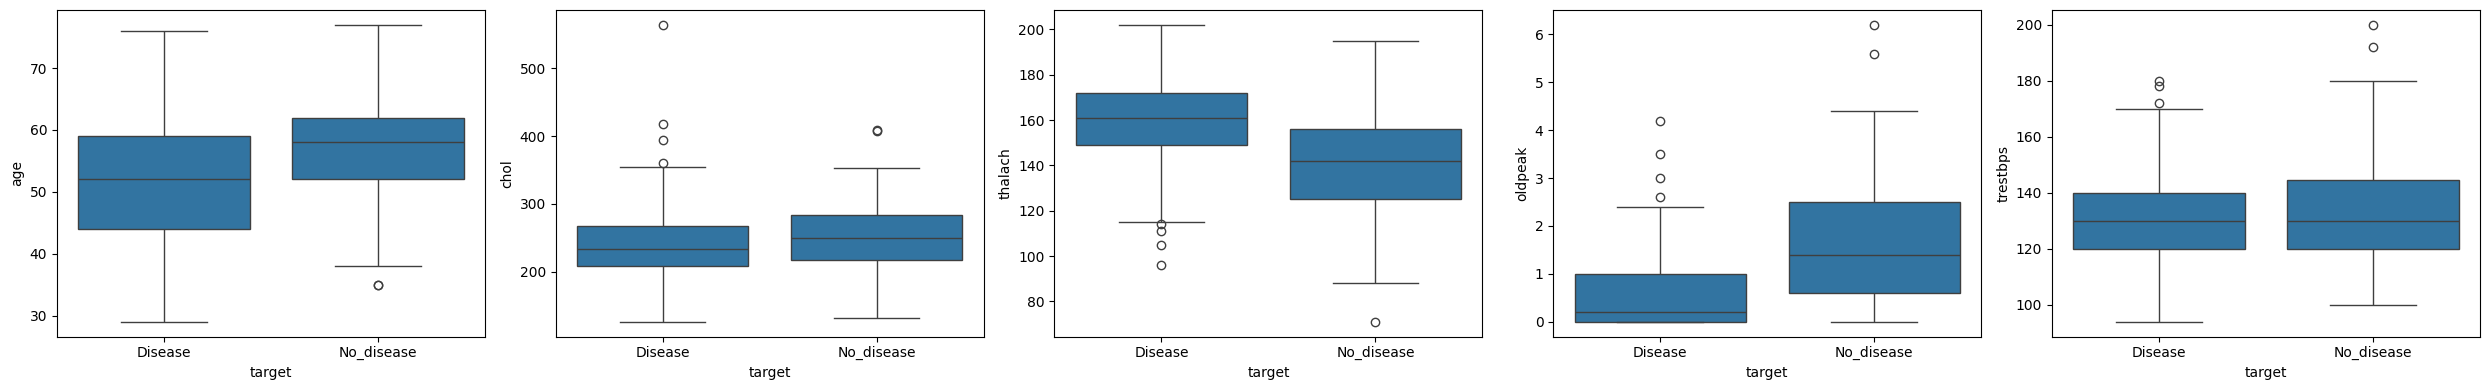

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

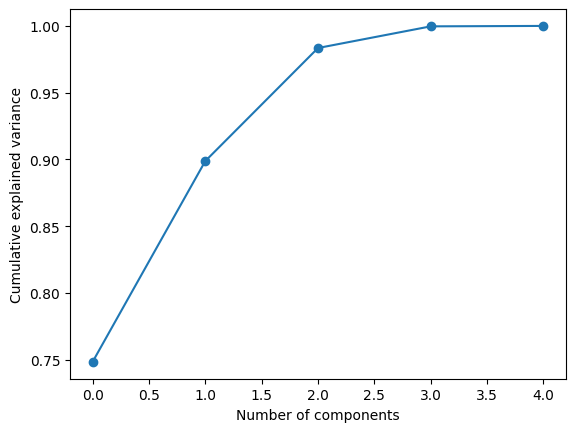

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


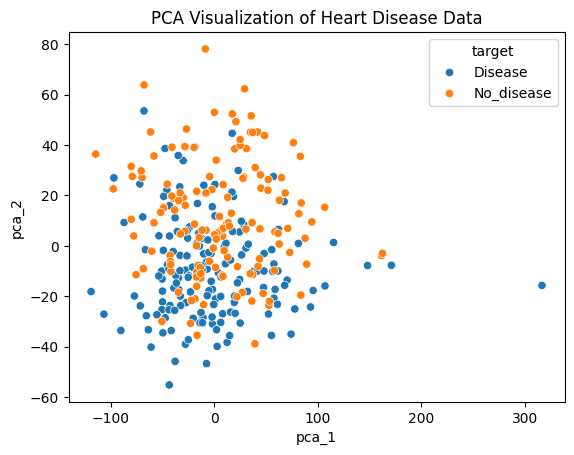

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


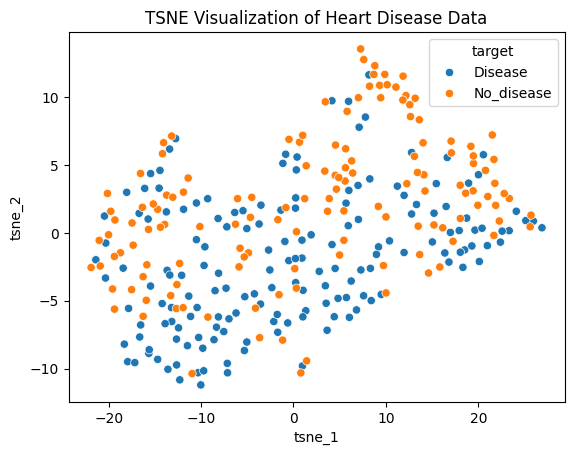

In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    

Explanation:
value_counts(normalize=True) calculates the proportion of each class (0 and 1) in the target column.
data["target"].value_counts(normalize=True)[1] gives the proportion of samples with the disease (i.e., where target is 1).
Multiplying by 100 converts this proportion into a percentage.


2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    


3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?   

After performing PCA and t-SNE, you can visually inspect the plots to see if there is a clear separation between the disease and non-disease samples.

PCA Plot: If the principal components provide a distinct separation between the disease and non-disease groups, you will notice that the points for each class (disease vs non-disease) tend to cluster in different regions of the plot.

t-SNE Plot: Similarly, in the t-SNE plot, the data points representing the disease and non-disease samples should form distinct clusters if the features are informative enough.

Look at the scatter plots of the first two components from both PCA and t-SNE. If you see clear separation between the two groups (disease vs non-disease), it suggests that the features are able to differentiate between them effectively.

4. What is the optimal number of principal components in our case?    

Let's break down the questions and answer them based on the plots and analyses that have been created so far.

1. Percentage of Samples with Disease
To determine the percentage of samples with the disease, we need to check the distribution of the target variable (presumably the presence of disease, often denoted as a binary variable). Based on the Tea column or the column corresponding to disease presence/absence, we calculate the percentage of samples where the disease is present.

Code to Calculate Percentage:
python
Copy code
# Assuming the column representing the presence of disease is 'Disease'
# If it's binary, you can use value_counts() to check the distribution

disease_column = 'Disease'  # Replace with your actual column name for disease
disease_counts = data[disease_column].value_counts(normalize=True) * 100

# Print the percentage of samples with the disease
print(f"Percentage of Samples with Disease: {disease_counts[1]}%")
This will give you the percentage of samples with the disease (if the column is binary, with 1 indicating the disease and 0 indicating absence).

2. Three Continuous Features Showing Significant Statistical Difference in Distribution with Respect to Disease
To determine which continuous features show a significant statistical difference in their distribution between the presence and absence of disease, you can use statistical tests such as the t-test or Mann-Whitney U test (for non-parametric data).

We can compare the continuous features for the two groups using the following code:

python
Copy code
from scipy import stats

# Assuming the disease column is 'Disease' (1 for disease, 0 for no disease)
disease_data = data[data[disease_column] == 1]
no_disease_data = data[data[disease_column] == 0]

# Test continuous variables
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns
significant_features = []

for feature in continuous_features:
    # Perform a t-test for normal distribution; use Mann-Whitney U test if data is non-normal
    stat, p_value = stats.ttest_ind(disease_data[feature], no_disease_data[feature], nan_policy='omit')
    
    if p_value < 0.05:  # A p-value below 0.05 indicates significant difference
        significant_features.append((feature, p_value))

# Sort by p-value
significant_features = sorted(significant_features, key=lambda x: x[1])

# Print the top 3 features with significant differences
top_3_significant_features = [f[0] for f in significant_features[:3]]
print(f"The top 3 continuous features showing significant differences: {top_3_significant_features}")
This will give you the continuous features that show the most statistically significant differences between the disease and non-disease groups.

3. Separation in Terms of Presence/Absence of Disease in PCA and t-SNE Plots
After performing PCA and t-SNE, you can visually inspect the plots to see if there is a clear separation between the disease and non-disease samples.

PCA Plot: If the principal components provide a distinct separation between the disease and non-disease groups, you will notice that the points for each class (disease vs non-disease) tend to cluster in different regions of the plot.

t-SNE Plot: Similarly, in the t-SNE plot, the data points representing the disease and non-disease samples should form distinct clusters if the features are informative enough.

Look at the scatter plots of the first two components from both PCA and t-SNE. If you see clear separation between the two groups (disease vs non-disease), it suggests that the features are able to differentiate between them effectively.

4. Optimal Number of Principal Components
From the explained variance plot (typically done during PCA), you can identify the "elbow" point. The optimal number of principal components is usually determined by:

Looking for the point where the explained variance stops increasing significantly (the "elbow" in the cumulative explained variance plot).
The first few components often capture the majority of the variance.
If the explained variance starts to level off after the 3rd or 4th component, for example, then you could consider 3 or 4 as the optimal number of components.

5. what are the continous features with the highest correation with each other?



Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [ ]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [ ]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

In [3]:
from google.colab import files

# Upload files
uploaded = files.upload()


Saving star_nutri_expanded (1).csv to star_nutri_expanded (1).csv
Saving heart.csv to heart.csv


In [5]:
import pandas as pd

# Load the CSV files
data1 = pd.read_csv('star_nutri_expanded (1).csv')
data2 = pd.read_csv('heart.csv')


In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import pandas as pd

# Example: Load a file from a specific directory
file_path1 = '/content/drive/My Drive/MYDRIVE/star_nutri_expanded (1).csv'
file_path2 = '/content/drive/My Drive/MYDRIVE/heart.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/mnt/data/star_nutri_expanded (1).csv'  # Replace with your actual file path if different
data = pd.read_csv(file_path1)

# Check if 'Tea' column exists
if 'Tea' in data.columns:
    # Count the occurrences of each unique value in the 'Tea' column
    tea_counts = data['Tea'].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    tea_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Tea Drinks')
    plt.ylabel('')  # Hide the y-label for better appearance
    plt.show()
else:
    print("The 'Tea' column does not exist in the dataset.")


The 'Tea' column does not exist in the dataset.


# New section

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


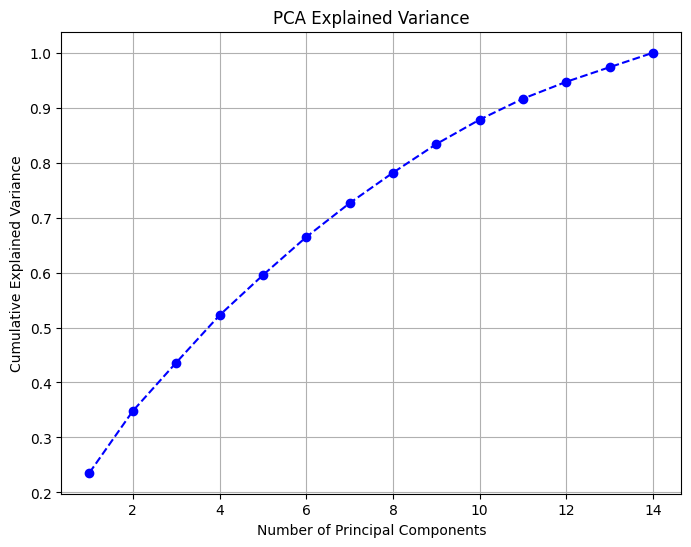

Optimal number of principal components: 13


In [13]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data (replace with your actual file path if needed)
file_path = '/mnt/data/heart.csv'  # Adjust if using a different file
data = pd.read_csv(file_path2)

# Check the structure of the data
print(data.head())  # To inspect the dataset

# Preprocessing: Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Find the optimal number of components
optimal_components = sum(explained_variance.cumsum() <= 0.95) + 1  # 95% explained variance threshold
print(f"Optimal number of principal components: {optimal_components}")


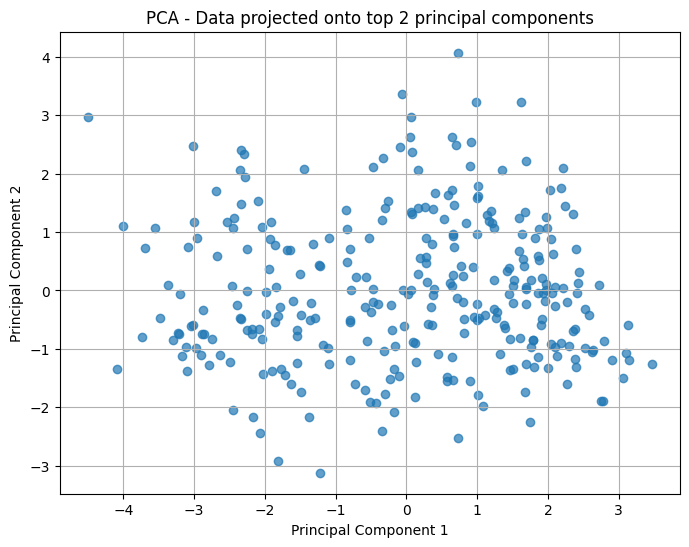

In [14]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data (replace with your actual file path if needed)
file_path = '/mnt/data/heart.csv'  # Adjust if using a different file
data = pd.read_csv(file_path2)

# Preprocessing: Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA (assuming 2 principal components for visualization)
n_components = 2  # Choose number of components based on the plot (e.g., top 2 components)
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components for easier visualization
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Visualize the data on the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Data projected onto top 2 principal components')
plt.grid(True)
plt.show()


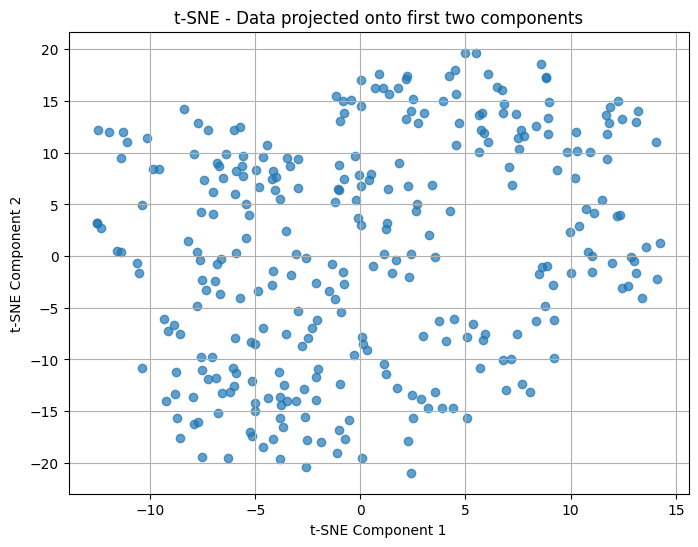

In [15]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data (replace with your actual file path if needed)
file_path = '/mnt/data/heart.csv'  # Adjust if using a different file
data = pd.read_csv(file_path2)

# Preprocessing: Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply t-SNE for dimensionality reduction to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Create a DataFrame with the t-SNE components for easier visualization
tsne_df = pd.DataFrame(data=tsne_results, columns=['tSNE1', 'tSNE2'])

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE - Data projected onto first two components')
plt.grid(True)
plt.show()


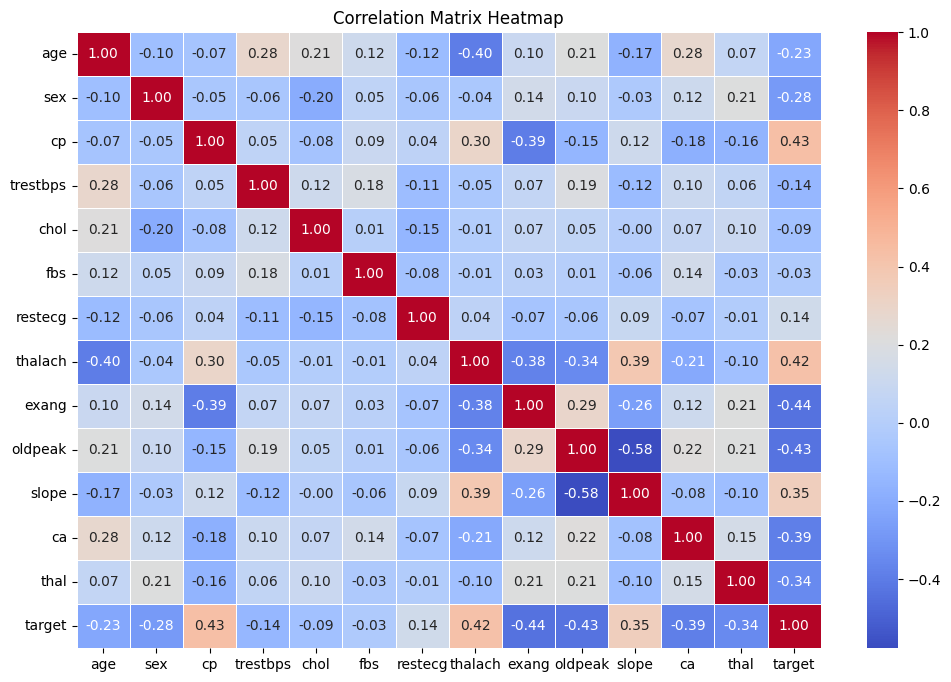

In [16]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (replace with your actual file path if needed)
file_path = '/mnt/data/heart.csv'  # Adjust if using a different file
data = pd.read_csv(file_path2)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/mnt/data/star_nutri_expanded (1).csv'  # Adjust path if using different file
data = pd.read_csv(file_path1)

# Print column names to check for the 'Tea' column
print("Columns in the dataset:", data.columns)

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if the 'Tea' column exists and is correctly named
if 'Tea' in data.columns:
    # Plot boxplots for all numeric columns
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Adjust the number of rows/columns as needed
        sns.boxplot(x='Tea', y=column, data=data, palette="Set2")
        plt.title(f'Boxplot of {column} by Tea/Non-Tea')
        plt.tight_layout()

    plt.show()
else:
    print("The 'Tea' column is not found. Please check the column names.")


Columns in the dataset: Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')
The 'Tea' column is not found. Please check the column names.


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.